### Importación de librerías


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

* Regresión Lineal

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

* Análisis de Componentes Principales

In [3]:
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

* Cluster

In [4]:
from sklearn.cluster import KMeans

* Clasificación

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
df = pd.read_csv('PdE_SeaLvl_Santander_2024.csv', sep=';')
print(df.head())

     AA  MM  DD  HH     NM    MM.1     MA  Programa
0  2024   1   1   0  191.2 -9999.9  181.2         1
1  2024   1   1   1  198.6    12.0  186.6         1
2  2024   1   1   2  235.1    13.4  221.7         1
3  2024   1   1   3  290.2    13.1  277.1         1
4  2024   1   1   4  351.0    12.2  338.8         1


In [7]:
# Remplazamos los datos no válidos por NaN
df.replace(-9999.9, np.nan, inplace=True)

# Conversión de nivel del mar y mareas a metros
df['NM'] = df['NM'] / 100
df['MM.1'] = df['MM.1'] / 100
df['MA'] = df['MA'] / 100

print(df.head())

     AA  MM  DD  HH     NM   MM.1     MA  Programa
0  2024   1   1   0  1.912    NaN  1.812         1
1  2024   1   1   1  1.986  0.120  1.866         1
2  2024   1   1   2  2.351  0.134  2.217         1
3  2024   1   1   3  2.902  0.131  2.771         1
4  2024   1   1   4  3.510  0.122  3.388         1


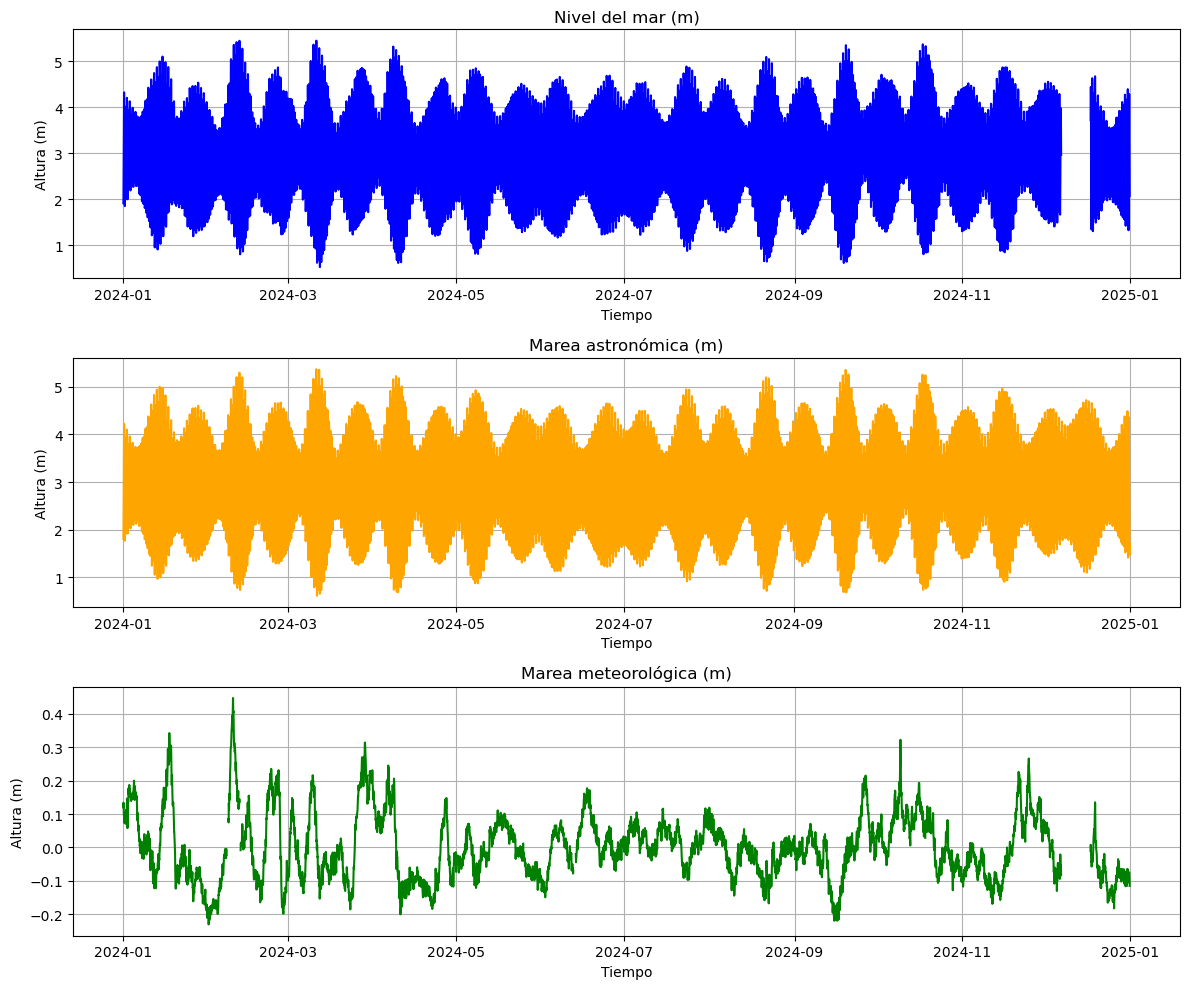

In [8]:
# Creamos una columa datetime a partir de las columnas AA, MM, DD, HH
df['fecha']=  pd.to_datetime(df[['AA', 'MM', 'DD', 'HH']].rename(columns={
    'AA': 'year', 'MM': 'month', 'DD': 'day', 'HH': 'hour'}))


# Graficar cada variable en subplots
plt.figure(figsize=(12, 10))

# Nivel del mar
plt.subplot(3, 1, 1)
plt.plot(df['fecha'], df['NM'], color='blue')
plt.title('Nivel del mar (m)')
plt.xlabel('Tiempo')
plt.ylabel('Altura (m)')
plt.grid(True)

# Marea astronómica
plt.subplot(3, 1, 2)
plt.plot(df['fecha'], df['MA'], color='orange')
plt.title('Marea astronómica (m)')
plt.xlabel('Tiempo')
plt.ylabel('Altura (m)')
plt.grid(True)


# Marea meteorológica
plt.subplot(3, 1, 3)
plt.plot(df['fecha'], df['MM.1'], color='green')
plt.title('Marea meteorológica (m)')
plt.xlabel('Tiempo')
plt.ylabel('Altura (m)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
# Limpiar datos (quitar NaN e infinitos)
nm_values = df['NM'].replace([np.inf, -np.inf], np.nan).dropna()

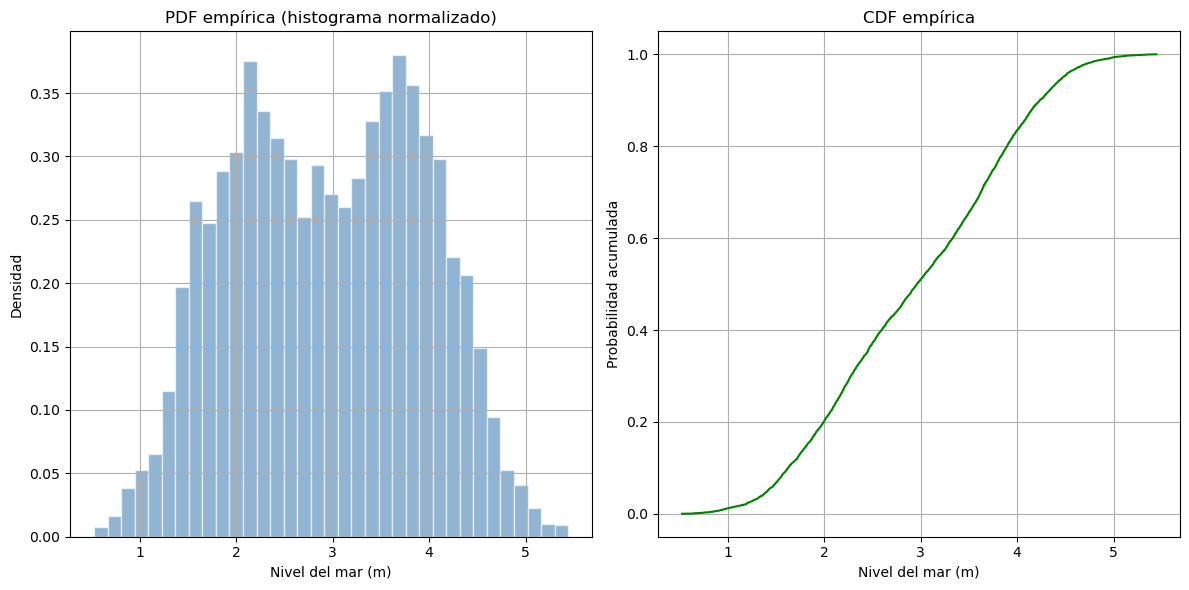

In [22]:
# --- PDF empírica ---
# Histograma normalizado
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(nm_values, bins=35, density=True, alpha=0.6, color='steelblue', edgecolor='white')
plt.title('PDF empírica (histograma normalizado)')
plt.xlabel('Nivel del mar (m)')
plt.ylabel('Densidad')
plt.grid(True)

# --- CDF empírica ---
x_sorted = np.sort(nm_values)
cdf_emp = np.arange(1, len(x_sorted)+1) / len(x_sorted)

plt.subplot(1, 2, 2)
plt.plot(x_sorted, cdf_emp, color='green')
plt.title('CDF empírica')
plt.xlabel('Nivel del mar (m)')
plt.ylabel('Probabilidad acumulada')
plt.grid(True)

plt.tight_layout()
plt.show()


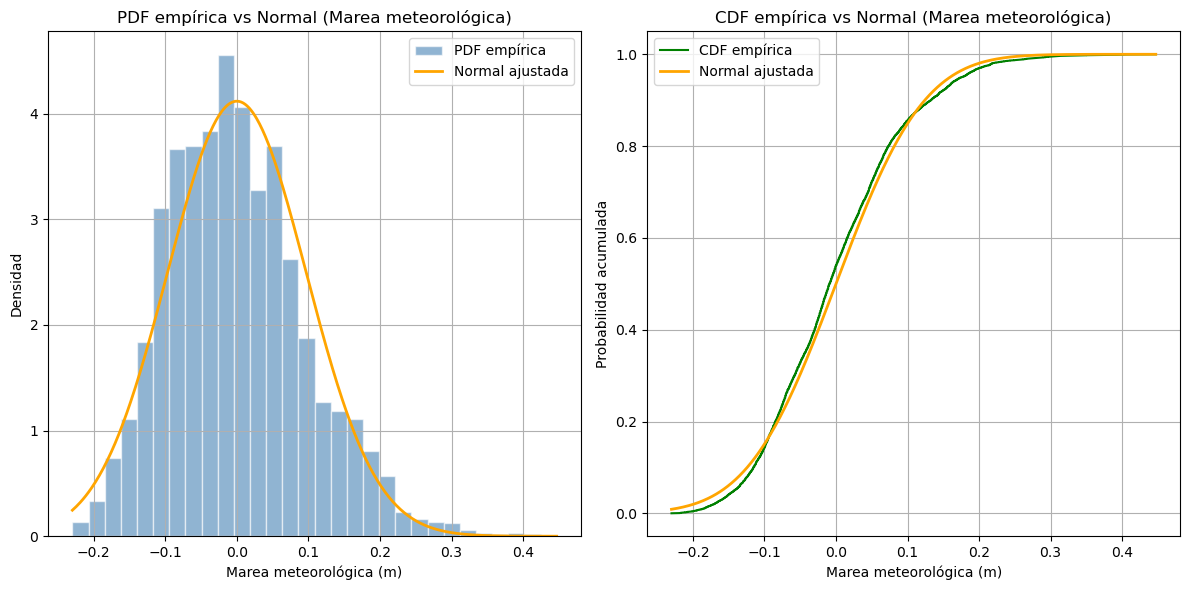

Parámetros Normal para MM: media=-0.0001, desviación estándar=0.0969


In [25]:

# Limpiar datos (asumiendo que ya tienes mm_values como array limpio en metros)
mm_values = df['MM.1'].replace([np.inf, -np.inf], np.nan).dropna().values

# Ajuste Normal
loc, scale = norm.fit(mm_values)  # loc = media, scale = desviación estándar

# Grid para PDF y CDF
x_grid = np.linspace(mm_values.min(), mm_values.max(), 500)
pdf_norm = norm.pdf(x_grid, loc=loc, scale=scale)
cdf_norm = norm.cdf(x_grid, loc=loc, scale=scale)

# CDF empírica
x_sorted = np.sort(mm_values)
cdf_emp = np.arange(1, len(x_sorted)+1) / len(x_sorted)

# --- Graficar ---
plt.figure(figsize=(12, 6))

# PDF
plt.subplot(1, 2, 1)
plt.hist(mm_values, bins=30, density=True, alpha=0.6, color='steelblue', edgecolor='white', label='PDF empírica')
plt.plot(x_grid, pdf_norm, 'orange', lw=2, label='Normal ajustada')
plt.title('PDF empírica vs Normal (Marea meteorológica)')
plt.xlabel('Marea meteorológica (m)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)

# CDF
plt.subplot(1, 2, 2)
plt.plot(x_sorted, cdf_emp, color='green', label='CDF empírica')
plt.plot(x_grid, cdf_norm, 'orange', lw=2, label='Normal ajustada')
plt.title('CDF empírica vs Normal (Marea meteorológica)')
plt.xlabel('Marea meteorológica (m)')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Parámetros Normal para MM: media={loc:.4f}, desviación estándar={scale:.4f}")